#Theano

Theano is a python library and an optimizing compiler, which allows to define, optimize and compute mathematical expressions effectively using multidimensional arrays.

Features:

* integration with NumPy
* effective computation of gradient (can automatically build expressions to compute gradient)
* fast and stable optimization (can recognize numerical inaccurate expressions and compute them using more stable algorithms)
* clear using GPU
* dynamic C++ code generation

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Import 
* theano
* theano.tensor

In [2]:
import numpy
import theano.tensor as T
import theano

Couldn't import dot_parser, loading of dot files will not be possible.


## Symbolic expessions for tensors
Theano’s strength is in expressing symbolic calculations involving tensors. There are many types of symbolic expressions for tensors:

* scalar
* vector
* matrix
* tensor
* ...

In [3]:
# create two vectors and one scaler
x = T.vector() 
y = T.vector()
alpha = T.scalar()

#### compute 
$x + \alpha y + (\sum x_i, ... ,\sum x_i)^T$

In [4]:
# define mathematical expression (you can use any function, which you use for NumPy arrays)
z = x + alpha * y + T.sum(x)

## Compile defined expression
`theano.function`

Returns a callable object that will calculate outputs from inputs

In [5]:
# input variables, output expessions
compiled_expr = theano.function([x, y, alpha], z)

## Compute compiled expression

In [6]:
x_val = numpy.arange(10)
y_val = numpy.arange(10)
alpha_val = 0.5

In [7]:
compiled_expr(x_val, y_val, alpha_val)

array([ 45. ,  46.5,  48. ,  49.5,  51. ,  52.5,  54. ,  55.5,  57. ,  58.5])

## Exercise

* compute $(<x, \alpha y> + <\beta x, y>)^2$

In [8]:
# create two vectors and one scaler
x = T.vector() 
y = T.vector()
alpha = T.scalar()
beta = T.scalar()
compiled_expr = theano.function([x, y, alpha, beta], 
                        (T.sum(x * (alpha * y)) + T.sum(y * (beta * x))) ** 2)

In [9]:
x_val = numpy.arange(10)
y_val = numpy.arange(10)
alpha_val = 0.1
beta_val = 0.3
compiled_expr(x_val, y_val, alpha_val, beta_val)

array(12996.0)

## Names for expressions

In [10]:
# define 
x = T.vector(name='x') 
y = T.vector(name='y')
alpha = T.scalar(name='a')

In [11]:
z = alpha * x * T.log(y) 

### `theano.printing.pprint()`
Theano provides the functions `theano.printing.pprint()` and `theano.printing.debugprint()` to print a graph to the terminal before or after compilation. `pprint()` is more compact and math-like, `debugprint()` is more verbose. Theano also provides `pydotprint()` that creates an image of the function. 

In [12]:
theano.pprint(x)

'x'

In [13]:
theano.pprint(z)

'((a * x) * log(y))'

In [14]:
compiled_expr = theano.function(inputs=[x, y, alpha], outputs=[z], name='function')

In [15]:
theano.printing.debugprint(compiled_expr)

Elemwise{Composite{(log(i0) * i1 * i2)}} [@A] ''   1
 |y [@B]
 |InplaceDimShuffle{x} [@C] ''   0
 | |a [@D]
 |x [@E]


In [16]:
theano.printing.pydotprint(compiled_expr, outfile="graph.png", var_with_name_simple=True)

The output file is available at graph.png


## Gradient

`grad` returns symbolic gradients for one or more variables with respect to some cost.

### 1D 

In [17]:
x = T.scalar(name='x') 
func = T.log(x) * T.sinh(x)
func_prime = T.grad(func, x)

In [18]:
theano.pprint(func_prime)

'(((fill((log(x) * sinh(x)), TensorConstant{1.0}) * sinh(x)) / x) + ((fill((log(x) * sinh(x)), TensorConstant{1.0}) * log(x)) * cosh(x)))'

#### Check yourself that this expession indeed gradient!!!

In [19]:
func_prime_function = theano.function([x], func_prime)

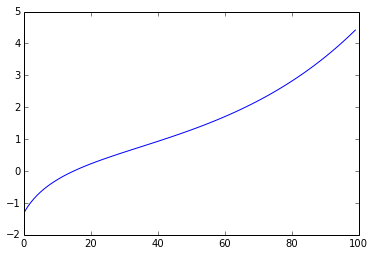

In [20]:
x = numpy.linspace(0.1, 2, 100)
plot([func_prime_function(point) for point in x])

### ND

In [21]:
x = T.vector(name='x') 
func = T.sum(x * x)
func_prime = T.grad(func, x)

In [22]:
theano.pprint(func_prime)

'((fill((x * x), fill(Sum{acc_dtype=float64}((x * x)), TensorConstant{1.0})) * x) + (fill((x * x), fill(Sum{acc_dtype=float64}((x * x)), TensorConstant{1.0})) * x))'

In [23]:
func_prime_function = theano.function([x], func_prime)

In [24]:
x1 = numpy.linspace(0.1, 2, 10)
x2 = numpy.linspace(0.1, 2, 10)
[func_prime_function(numpy.array([point1, point2])) for point1, point2 in zip(x1, x2)]

[array([ 0.2,  0.2]),
 array([ 0.62222222,  0.62222222]),
 array([ 1.04444444,  1.04444444]),
 array([ 1.46666667,  1.46666667]),
 array([ 1.88888889,  1.88888889]),
 array([ 2.31111111,  2.31111111]),
 array([ 2.73333333,  2.73333333]),
 array([ 3.15555556,  3.15555556]),
 array([ 3.57777778,  3.57777778]),
 array([ 4.,  4.])]

#### Check yourself that this result is correct!!!

## Shared variables
`theano.shared` returns a SharedVariable variable, initialized with a copy or reference of `value`.

Variable with Storage that is shared between functions that it appears in. These variables are meant to be created by registered shared constructors (see `shared_constructor()`).
The user-friendly constructor is `shared()`

In [25]:
w = theano.shared(numpy.arange(10, dtype=float), name='weight')
x = T.vector('x')
func = theano.function([x], T.sum(x * w))
func_grad = theano.function([x], T.grad(T.sum(x * w), x))

In [26]:
func_grad(numpy.arange(10) * 0.)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

## Matrix

In [27]:
x = T.vector('x')
A = T.matrix('A')
z = A.dot(x)
normAx = theano.function([x, A], z.dot(z))

#### Compute this expression by yourself:

$A = [[1, 1], [1, 1]]$

$x = [0, 2]^T$

What is the answer?

Now compare it with theano result.

In [28]:
normAx([0, 2], [[1, 1], [1, 1]])

array(8.0)

In [29]:
norm_grad = theano.function([x, A], T.grad(z.dot(z), x))

#### Compute gradient by yourself!!! Write its expression.

$(w, x) | grad(x) = w$

$(Ax, Ax) | grad(x) = 2 (A^T A) x$

#### Compute gradient for 
$A = [[0, 1], [1, 1]]$

**in point**:
$x = [1, 1]^T$

What is the answer?

Now compute the same with theano


In [30]:
norm_grad([0, 1], [[1, 1], [1, 1]])

array([ 4.,  4.])

## Logistic regression 

Write logistic regression algorithm using theano! Now this is really very simple!

In [31]:
# import function to create toy dataset for classification
from sklearn.datasets import make_blobs, make_moons
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import roc_auc_score
from scipy.special import expit

In [32]:
n_features = 10 # number of features
centers = 2 # number of classes
X, y = make_blobs(n_samples=10000, centers=centers, n_features=n_features)
X, X_test, y, y_test = train_test_split(X, y, train_size=0.5)

In [33]:
# create theano objects for data(they should be shared because we know X, y)
X_ = theano.shared(X, name='X')
y_ = theano.shared(y, name='y')

In [34]:
# define vector of weights, we don't know it, that is why:
w = T.vector(name='w')

#### Logistic regression description:
$p_i = sigmoid(\sum_j X_{ij}w_j)$

$loss=\sum y_i \log{p} + (1-y_i)\log{(1 - p)}$

$-loss \to min$

In [35]:
# write expression for probabilities
p_sig = T.nnet.sigmoid(X_.dot(w))
p_bck = 1 - p_sig

In [36]:
# write expression for loss
llh_ = y_.dot(T.log(p_sig)) + (1 - y_).dot(T.log(p_bck))
minus_llh_ = - llh_

In [37]:
# compile loss expression, compile gradient expression for loss
loss_function = theano.function([w], minus_llh_)
loss_grad = theano.function([w], theano.grad(minus_llh_, w))

In [38]:
loss_function(numpy.random.random(n_features))

array(50823.57239060069)

Now we have expessions for loss and it gradient and we need some method of optimization

In [39]:
from scipy.optimize import minimize

In [40]:
# minimize loss function using its gradient
result = minimize(fun=loss_function, x0=numpy.zeros(n_features), jac=loss_grad)

In [41]:
result

   status: 0
  success: True
     njev: 5
     nfev: 5
 hess_inv: array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
      fun: -0.0
        x: array([-362.83230601,  -67.433171  , -221.33906513, -565.37415879,
       -139.89050158,  395.38166795,  222.71447739, -376.76992602,
        280.57181274, -449.54250183])
  message: 'Optimization terminated successfully.'
      jac: array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
      nit: 1

In [42]:
w_optimal = result['x']

Now predict output of logistic regression for the test sample and compute AUC

In [43]:
pred = X_test.dot(w_optimal)
roc_auc_score(y_test, pred)

1.0

####Is it simple with theano?

### Another implementation of logistic regression (add shift and l2 regularization)

In [44]:
training_steps = 1000
X_ = T.matrix("x")
y_ = T.vector("y")
w = theano.shared(numpy.random.random(X.shape[1]), name="w")
# Add shift to the model
b = theano.shared(0., name="b")

In [45]:
p_sig = T.nnet.sigmoid(T.dot(X_, w) - b) 
llh_ = y_ * T.log(p_sig) + (1 - y_) * T.log(1 - p_sig)
minus_llh_ = - llh_
cost = minus_llh_.mean() + 0.01*(w**2).sum() # add l2 regularization with parameter 0.01 / The cost to optimize
grad_w, grad_b = T.grad(cost, [w, b])
# define updates after run the function
train = theano.function(inputs=[X_, y_], outputs=[p_sig, minus_llh_], 
                        updates=[[w, w - 0.001*grad_w], [b, b - 0.001*grad_b]], name = "train")
predict = theano.function(inputs=[X_], outputs=p_sig, name = "predict")

for i in range(training_steps):
    probs, err = train(X, y)
pred = predict(X_test)
roc_auc_score(y_test, pred)

1.0

# Neural Network

## 1-hidden layer
This is a simple NN description with one hidden layer:

Params: 

* W,

* v

Calculations:

* h = sigmoid(X_.dot(W))
* output = v.dot(h)
* p_sig = sigmoid(output)
* p_bck = 1 - p_sig


Code it using theano

In [46]:
n_hidden = 10

X_ = theano.shared(X, name='X')
y_ = theano.shared(y, name='y')
param = T.vector()

# we have one vector with all weights, and from it we need to extract matrix and vector
W_ = param[:n_features * n_hidden].reshape((n_features, n_hidden))
v_ = param[n_features * n_hidden:]

h = T.nnet.sigmoid(X_.dot(W_))
output = h.dot(v_)
p_sig = T.nnet.sigmoid(output)
p_bck = 1 - p_sig
llh_ = y_.dot(T.log(p_sig)) + (1 - y_).dot(T.log(p_bck))
minus_llh_ = -llh_

loss_function = theano.function([param], minus_llh_)
loss_grad = theano.function([param], theano.grad(minus_llh_, param))
result = minimize(loss_function, 
                  numpy.random.random(n_features*n_hidden + n_hidden), 
                  jac=loss_grad)

In [47]:
# transform result into matrix and vector
optimal = result['x']
W = optimal[:n_features * n_hidden].reshape(n_features, n_hidden)
v = optimal[n_features * n_hidden:]

In [48]:
pred = expit(X_test.dot(W))
pred = pred.dot(v)
roc_auc_score(y_test, pred)

1.0

In [49]:
X

array([[ 6.88951992,  8.7154808 , -1.33103596, ...,  7.84275691,
        -1.71435118,  3.21358125],
       [ 0.7906828 ,  6.80442128, -6.28298061, ..., -2.96493226,
         4.78836884, -6.26725524],
       [ 7.26258108,  6.11155358, -1.3987088 , ...,  5.97295578,
        -0.42921152,  2.53363283],
       ..., 
       [ 0.46598312,  4.62155534, -6.73518731, ..., -1.21393881,
         5.02606149, -6.69344647],
       [ 0.38682719,  4.97253328, -4.81810229, ..., -1.67211168,
         5.54852303, -8.79102878],
       [ 1.09640089,  6.56048096, -4.89995423, ...,  0.47006076,
         6.14387727, -8.20203142]])

## 2-hidden layers

### Using 1-hidden layer NN write 2-layers.

In [50]:
# generate another dataset
X, y = make_moons(n_samples=20000)
X, X_test, y, y_test = train_test_split(X, y, train_size=0.5)

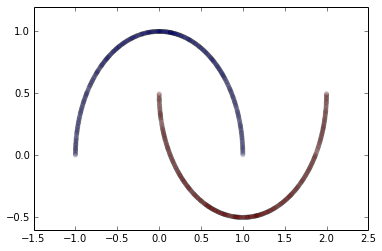

In [51]:
scatter(X[:, 0], X[:, 1], c=y, alpha=0.01)

In [52]:
X_ = theano.shared(X, name='X')
y_ = theano.shared(y, name='y')
param = T.vector()

n_hidden_1 = 10
n_hidden_2 = 6
n_features = X.shape[1]

n_1 = n_features * n_hidden_1
n_2 = n_hidden_1 * n_hidden_2

W1_ = param[:n_1].reshape((n_features, n_hidden_1))
W2_ = param[n_1: n_1 + n_2].reshape((n_hidden_1, n_hidden_2))
v_ = param[n_1 + n_2:]

h1 = T.nnet.sigmoid(X_.dot(W1_))
h2 = T.nnet.sigmoid(h1.dot(W2_))
output = h2.dot(v_)

p_sig = T.nnet.sigmoid(output)
p_bck = 1 - p_sig
llh_ = y_.dot(T.log(p_sig)) + (1 - y_).dot(T.log(p_bck))
minus_llh_ = -llh_

loss_function = theano.function([param], minus_llh_)
loss_grad = theano.function([param], theano.grad(minus_llh_, param))
result = minimize(loss_function, numpy.random.normal(size=n_1 + n_2 + n_hidden_2), jac=loss_grad)

In [53]:
optimal = result['x']
W1 = optimal[:n_1].reshape(n_features, n_hidden_1)
W2 = optimal[n_1:n_1 + n_2].reshape(n_hidden_1, n_hidden_2)
v = optimal[n_1 + n_2:]

In [54]:
pred = expit(X_test.dot(W1))
pred = expit(pred.dot(W2))
pred = pred.dot(v) 
roc_auc_score(y_test, pred)

0.5

### Define function fo NN to modify it by a simple way

In [55]:
def fit_predict_NN(X, y, X_test, activate_functions, output_function, hidden_layers):
    X_ = theano.shared(X, name='X')
    y_ = theano.shared(y, name='y')
    param = T.vector()
    dim = X.shape[1]
    
    def activation(data_, parameter):
        n_previous = 0
        dim_previous = dim
        h = data_
        for n_hidden, func in zip(hidden_layers, activate_functions):
            N = dim_previous * n_hidden
            W_ = parameter[n_previous:n_previous + N].reshape((dim_previous, n_hidden))
            h = func(h.dot(W_))
            dim_previous = n_hidden
            n_previous += N

        # output     
        v_ = parameter[n_previous:]
        output = h.dot(v_)
        n_previous = n_previous + dim_previous
        
        return output_function(output), n_previous

    p_sig = activation(X_, param)[0]
    p_bck = 1 - p_sig
    llh_ = y_.dot(T.log(p_sig)) + (1 - y_).dot(T.log(p_bck))
    minus_llh_ = -llh_
    
    # optimize
    loss_function = theano.function([param], minus_llh_)
    loss_grad = theano.function([param], theano.grad(minus_llh_, param))
    result = minimize(loss_function, numpy.random.normal(size=activation(X_, param)[1]), jac=loss_grad)
    optimal_params = result['x']
    
    # predict data
    data = T.matrix()
    compiled_activation = theano.function([data, param], activation(data, param)[0])
    
    return compiled_activation(X_test, optimal_params)

In [56]:
# generate another dataset
X, y = make_moons(n_samples=1000)
# add noise to data
X += numpy.random.random(size=X.shape[0] * X.shape[1]).reshape(X.shape)
X, X_test, y, y_test = train_test_split(X, y, train_size=0.5)

pred = fit_predict_NN(X, y, X_test, [T.nnet.sigmoid] * 3, T.nnet.sigmoid, [20, 10, 5])
roc_auc_score(y_test, pred)

0.91160544065108384

## activation intermediate functions:
* sigmoid (which we used)
* relu 
* softplus

### ReLU - rectifier linear unit.

In the context of artificial neural networks, the rectifier is an activation function defined as

$f(x) = \max(0, x)$

where x is the input to a neuron. This activation function has been argued to be more biologically plausible than the widely used logistic sigmoid (which is inspired by probability theory; see logistic regression) and its more practical counterpart, the hyperbolic tangent. The rectifier is the most popular activation function for deep neural networks.

A unit employing the rectifier is also called a rectified linear unit (ReLU).

###Softplus
A smooth approximation to the rectifier is the analytic function

$f(x) = \ln(1 + e^x)$

which is called the softplus function.

In [57]:
def generate_relu(alpha):
    def relu(x):
        return T.switch(x > 0, x, alpha * x)
    return relu

In [58]:
# generate another dataset
X, y = make_moons(n_samples=1000)
X += numpy.random.random(size=X.shape[0] * X.shape[1]).reshape(X.shape)
X, X_test, y, y_test = train_test_split(X, y, train_size=0.5)

In [59]:
pred = fit_predict_NN(X, y, X_test, [T.nnet.softplus] * 3, T.nnet.sigmoid, [10, 10, 5])
roc_auc_score(y_test, pred)

0.87848001796138309

In [60]:
pred = fit_predict_NN(X, y, X_test, [generate_relu(0.5)] * 2, T.nnet.sigmoid, [10, 10])
roc_auc_score(y_test, pred)

0.92821059721598576

## Multiclassification  Problem

In this case we need use `softmax` activate fucntion for the last layer

**TODO**:

* Write multiclassification NN
* add shift to the NN formula ( h = (x, w) + b )

In [61]:
def fit_predict_mult_NN(X, y, X_test, activate_functions, hidden_layers):
    X_ = theano.shared(X, name='X')
    y_ = theano.shared(y, name='y')
    param = T.vector()
    n_class = len(numpy.unique(y))
    dim = X.shape[1]
    
    def activation(data_, parameter):
        n_previous = 0
        dim_previous = dim
        h = data_
        for n_hidden, func in zip(hidden_layers, activate_functions):
            N = dim_previous * n_hidden
            W_ = parameter[n_previous:n_previous + N].reshape((dim_previous, n_hidden))
            n_previous += N
            b = parameter[n_previous: n_previous + n_hidden]
            n_previous += n_hidden
            h = func(h.dot(W_) + 0. * b[numpy.newaxis, :]) # here is brodcasing for b => it will be copied for each row
            dim_previous = n_hidden

        # output     
        v_ = parameter[n_previous:].reshape((dim_previous, n_class))
        output = h.dot(v_)
        n_previous = n_previous + dim_previous * n_class
        
        return T.nnet.softmax(output), n_previous
    
    p_ = activation(X_, param)[0]
    llh_ = T.log(p_[T.arange(len(X)), y_]).sum()
    minus_llh_ = -llh_
    
    # optimize
    loss_function = theano.function([param], minus_llh_)
    loss_grad = theano.function([param], theano.grad(minus_llh_, param))
    result = minimize(loss_function, numpy.random.normal(size=activation(X_, param)[1]), 
                      jac=loss_grad)
    optimal_params = result['x']
    
    data = T.matrix()
    compiled_activation = theano.function([data, param], activation(data, param)[0])

    return compiled_activation(X_test, optimal_params)   

In [62]:
n_features = 20
n_class = 5
X, y = make_blobs(n_samples=2000, centers=n_class, n_features=n_features)
X += (numpy.random.normal(size=X.shape[0]*X.shape[1]) * 10).reshape(X.shape)
X, X_test, y, y_test = train_test_split(X, y, train_size=0.5)

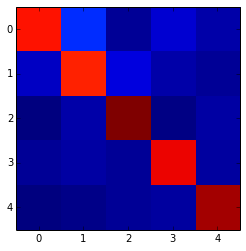

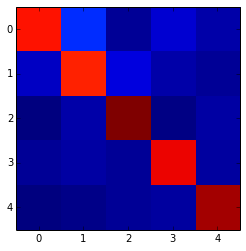

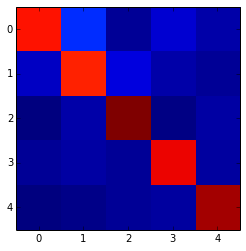

In [63]:
from sklearn.metrics import confusion_matrix
for func in [T.nnet.sigmoid, T.nnet.softmax, generate_relu(0.5)]:
    pred = fit_predict_mult_NN(X, y, X_test, [], [])
    imshow(confusion_matrix(y_test, numpy.argmax(pred, axis=1)), interpolation='nearest')
    plt.xticks(range(n_class), range(n_class))
    plt.yticks(range(n_class), range(n_class))
    show()

## Neural Net interafce in `hep_ml`: just write activation function using `theano`

In [64]:
import hep_ml
from hep_ml import nnet

In [65]:
from hep_ml.nnet import AbstractNeuralNetworkClassifier

class SimpleNeuralNetwork(AbstractNeuralNetworkClassifier):
    def prepare(self):
        # getting number of layers in input, hidden, output layers
        # note that we support only one hidden layer here
        n1, n2, n3 = self.layers_
        
        # creating parameters of neural network
        W1 = self._create_matrix_parameter('W1', n1, n2)
        W2 = self._create_matrix_parameter('W2', n2, n3)
        
        # defining activation function
        def activation(input):
            first = T.nnet.sigmoid(T.dot(input, W1))
            return T.dot(first, W2)

        return activation

In [66]:
X, y = make_moons(n_samples=2000)
X += numpy.random.random(size=X.shape[0] * X.shape[1]).reshape(X.shape)
X, X_test, y, y_test = train_test_split(X, y, train_size=0.5)

In [67]:
nnet_simple = SimpleNeuralNetwork()
nnet_simple.fit(X, y)
pred = nnet_simple.predict_proba(X_test)[:, 1]
print roc_auc_score(y_test, pred)

0.931114365278


### Rewrite above binary classification NN into this interace 

Here is you daon't need to add `b` parameter, this interface does it and includes additional column in `X`

In [68]:
class MyNeuralNetwork(AbstractNeuralNetworkClassifier):
    def prepare(self):
        # getting number of layers in input, hidden, output layers
        # note that we support only one hidden layer here
        W = []
        # creating parameters of neural network
        for index, n_cur in enumerate(self.layers_[1:]):
            W.append(self._create_matrix_parameter('W{}'.format(index+1), self.layers_[index], n_cur))
        
        # defining activation function
        def activation(input):
            data = input
            for W_matrix in W:
                data = T.nnet.sigmoid(T.dot(data, W_matrix))
            return data

        return activation

In [69]:
nnet_my = MyNeuralNetwork(layers=[10, 5, 5])
nnet_my.fit(X, y)
pred = nnet_my.predict_proba(X_test)[:, 1]
print roc_auc_score(y_test, pred)

0.924218599962


## Own rule

In [70]:
# your ideas!

## NN in `hep_ml`

In [71]:
from hep_ml.nnet import PairwiseNeuralNetwork, RBFNeuralNetwork, MLPClassifier

In [76]:
for models in [PairwiseNeuralNetwork(), RBFNeuralNetwork(), MLPClassifier()]:
    models.fit(X, y)
    pred = models.predict_proba(X_test)[:, 1]
    print roc_auc_score(y_test, pred)

0.931114365278
0.945213974778
0.916326579604


# Bagging over NN - meta algorithms

In [77]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

In [78]:
base = RBFNeuralNetwork()
meta_ada = AdaBoostClassifier(base_estimator=base, n_estimators=10, learning_rate=0.05)
meta_ada.fit(X, y)
pred = meta_ada.predict_proba(X_test)[:, 1]
print roc_auc_score(y_test, pred)

0.959725689777


In [79]:
base = RBFNeuralNetwork()
meta_bagging = BaggingClassifier(base_estimator=base, n_estimators=50, max_samples=0.7)
meta_bagging.fit(X, y)
pred = meta_bagging.predict_proba(X_test)[:, 1]
print roc_auc_score(y_test, pred)

0.951771653543


**Oy! This can really work for simple data! Try apply this meta algorithms possibilities to your analysis and improve your models!**